# Treinamento de Redes Neurais Artificiais

**Disciplina:** Redes Neurais Artificiais 2025.1

**Professora orientadora:** 
Elloa B. Guedes (ebgcosta@uea.edu.br)

**Integrantes da equipe:**
* Adriana Raffaella Dos Santos Fonseca (ardsf.eng23@uea.edu.br)
* Ana Flavia De Castro Segadilha Da Silva (afdcsds.eng23@uea.edu.br)
* Davi Aguiar Moreira (dam.eng23@uea.edu.br)
* Guilherme Goncalves Moraes (ggm.eng23@uea.edu.br)
* Ian Garrido Reis (igr.eng23@uea.edu.br)
* Luiz Fernando Borges Brito (lfbb.eng23@uea.edu.br)
* Pedro Vitor Barros Maranhão (pvbm.eng23@uea.edu.br)
* Rita De Cassia Brasil Alves (rdcba.eng23@uea.edu.br)
* Yago De Oliveira Feitoza (ydof.eng21@uea.edu.br)

---

## **Importação das bibliotecas**

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable

### **Importação e Holdout do dataset**

In [4]:
file_path = 'modified_star_classification.csv'

Data a expressiva quantidade de exemplos presentes no dataset, optou-se por dividir os dados por holdout 60/40. Além disso, a fim de possibilitar uma análise comparativa de abordagens posteriormente, utiliza-se um seed (42 por convenção).

In [5]:
df = pd.read_csv(file_path)

y = df['class']
X = df.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [6]:
type(X_train)

pandas.core.frame.DataFrame

In [7]:
X_train.to_csv('holdout/x_train.csv', encoding='utf-8')
X_test.to_csv('holdout/x_test.csv', encoding='utf-8')
y_train.to_csv('holdout/y_train.csv', encoding='utf-8')
y_test.to_csv('holdout/y_test.csv', encoding='utf-8')

### **Abordagem 1: 60/40**

Nesta abordagem, utiliza-se o holdout do modo como foi gerado anteriormente, isto é, sem o tratamento do desbalanceamento de dados. Nesse contexto, o conjunto de treinamento tem a seguinte composição: 59% dos são galáxias, 21% são estrelas e 18% são quasares. Desse modo, utilizam-se métricas ponderadas para permitir uma análise de resultados de acordo com a desigualdade no número de exemplos por classes.

In [23]:
#Uso da pirâmide geométrica

alpha=3

# Definindo Ni = Número de neurônios na camada de entrada (Número de features em X)
Ni= 6 

# Definindo No = Número de neurônios na camada de saída (Número de tipos em Cover_Type)
No = 7

Nh=round((alpha*((Ni*No)**0.5)),0)

print(Nh)


19.0


In [37]:
#Construção de Arquiteturas

#19 neurônios
arquiteturas=[
    ((10, 9), 'adam', 'relu', 100),    #1
    ((10, 9), 'sgd', 'tanh', 100),     #2
    ((9, 10), 'adam', 'relu', 100),    #3
    ((9, 10), 'sgd', 'tanh', 100),     #4
    ((12, 7), 'sgd', 'tanh', 100),      #5
    ((12, 7), 'adam', 'relu', 100), #6
    ((7, 12), 'sgd', 'relu', 100),      #7
    ((7, 12), 'adam', 'logistic', 100),     #8
]

In [47]:
#Treinamento das arquiteturas

resultados=[]
for i in range (len(arquiteturas)):
    model = MLPClassifier(
    hidden_layer_sizes=arquiteturas[i][0],
    activation=arquiteturas[i][2],
    solver=arquiteturas[i][1],
    alpha=0.001,
    learning_rate_init=0.001,
    n_iter_no_change=10,
    max_iter=200,
    random_state=42,
    early_stopping=True
    )
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    resultados.append([accuracy,precision,recall, f1_weighted])

#Construção da Tabela usando Prettytable

table = PrettyTable()
table.title=('Treinamento de arquiteturas com método da pirâmide')
table.field_names = ['Arquitetura', 'Acurácia','Precisão','Revocação','F1-Score']
for i in range(len(arquiteturas)):
    table.add_row([f'{i+1}',f'{resultados[i][0]:.4f}',f'{resultados[i][1]:.4f}',f'{resultados[i][2]:.4f}',f'{resultados[i][3]:.4f}'])
print(table)

+----------------------------------------------------------+
|    Treinamento de arquiteturas com método da pirâmide    |
+-------------+----------+----------+-----------+----------+
| Arquitetura | Acurácia | Precisão | Revocação | F1-Score |
+-------------+----------+----------+-----------+----------+
|      1      |  0.9698  |  0.9697  |   0.9698  |  0.9695  |
|      2      |  0.9656  |  0.9655  |   0.9656  |  0.9653  |
|      3      |  0.9698  |  0.9697  |   0.9698  |  0.9695  |
|      4      |  0.9657  |  0.9657  |   0.9657  |  0.9654  |
|      5      |  0.9614  |  0.9615  |   0.9614  |  0.9611  |
|      6      |  0.9692  |  0.9691  |   0.9692  |  0.9689  |
|      7      |  0.9633  |  0.9634  |   0.9633  |  0.9630  |
|      8      |  0.9674  |  0.9673  |   0.9674  |  0.9671  |
+-------------+----------+----------+-----------+----------+


In [35]:
model = MLPClassifier(
    hidden_layer_sizes=(32, 64),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    n_iter_no_change=10,
    max_iter=200,
    random_state=42,
    early_stopping=True
)

model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1-Score: {f1_weighted:.4f}')

Acurácia: 0.9706
Precisão: 0.9705
Revocação: 0.9706
F1-Score: 0.9704


### **Abordagem 2: Downsampling**

Esta abordagem se dá por downsampling, i.e., iguala-se a quantidade de exemplos para cada dado a fim de permitir que o treinamento do analise a mesma quantidade de exemplos para cada classe.

**Balanceando as classes**

In [13]:
X_train_std_df = pd.DataFrame(X_train_std, columns=X.columns, index=X_train.index)
X_test_std_df = pd.DataFrame(X_test_std, columns=X.columns, index=X_test.index)
train_df = pd.concat([X_train_std_df, y_train], axis=1)

class_counts = train_df['class'].value_counts()

min_count = class_counts.min()

balanced_dfs = []

for class_name in class_counts.index:
    class_df = train_df[train_df['class'] == class_name]
    balanced_dfs.append(class_df.sample(min_count, random_state=42))

balanced_train_df = pd.concat(balanced_dfs)

X_train_balanced = balanced_train_df.drop('class', axis=1)
y_train_balanced = balanced_train_df['class']


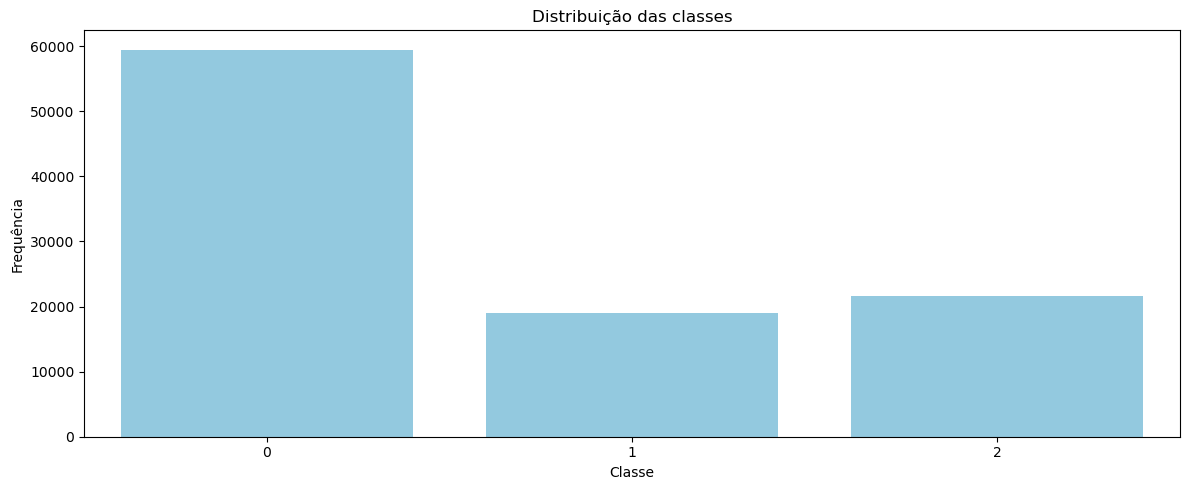

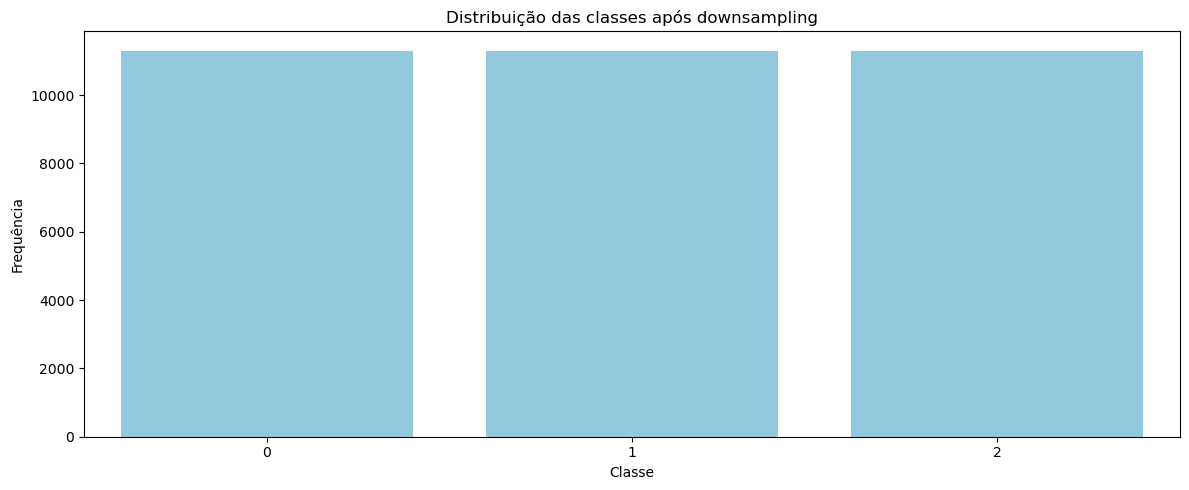

In [14]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='class', color='skyblue')
plt.title(f'Distribuição das classes')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()
print()

plt.figure(figsize=(12, 5))
sns.countplot(data=balanced_train_df, x='class', color='skyblue')
plt.title(f'Distribuição das classes após downsampling')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()
print()

In [49]:
#Treinamento das arquiteturas

resultados_downsample=[]
for i in range (len(arquiteturas)):
    model = MLPClassifier(
    hidden_layer_sizes=arquiteturas[i][0],
    activation=arquiteturas[i][2],
    solver=arquiteturas[i][1],
    alpha=0.001,
    learning_rate_init=0.001,
    n_iter_no_change=10,
    max_iter=200,
    random_state=42,
    early_stopping=True
    )
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_std_df)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1= f1_score(y_test, y_pred, average='weighted')
    resultados_downsample.append([accuracy,precision,recall, f1])

#Construção da Tabela usando Prettytable

table = PrettyTable()
table.title=('Treinamento de arquiteturas com método da pirâmide')
table.field_names = ['Arquitetura', 'Acurácia','Precisão','Revocação','F1-Score']
for i in range(len(arquiteturas)):
    table.add_row([f'{i+1}',f'{resultados_downsample[i][0]:.4f}',f'{resultados_downsample[i][1]:.4f}',f'{resultados_downsample[i][2]:.4f}',f'{resultados_downsample[i][3]:.4f}'])
print(table)

+----------------------------------------------------------+
|    Treinamento de arquiteturas com método da pirâmide    |
+-------------+----------+----------+-----------+----------+
| Arquitetura | Acurácia | Precisão | Revocação | F1-Score |
+-------------+----------+----------+-----------+----------+
|      1      |  0.9654  |  0.9656  |   0.9654  |  0.9654  |
|      2      |  0.9577  |  0.9581  |   0.9577  |  0.9576  |
|      3      |  0.9625  |  0.9626  |   0.9625  |  0.9624  |
|      4      |  0.9584  |  0.9589  |   0.9584  |  0.9584  |
|      5      |  0.9584  |  0.9589  |   0.9584  |  0.9584  |
|      6      |  0.9665  |  0.9666  |   0.9665  |  0.9665  |
|      7      |  0.9562  |  0.9568  |   0.9562  |  0.9562  |
|      8      |  0.9619  |  0.9621  |   0.9619  |  0.9618  |
+-------------+----------+----------+-----------+----------+


**Treinamento**

In [15]:
second_model = MLPClassifier(
    hidden_layer_sizes=(32, 64),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    n_iter_no_change=10,
    max_iter=200,
    random_state=42,
    early_stopping=True
)

second_model.fit(X_train_balanced, y_train_balanced)

y_pred = second_model.predict(X_test_std_df)

In [16]:
accuracy_down = accuracy_score(y_test, y_pred)
precision_down = precision_score(y_test, y_pred, average='weighted')
recall_down = recall_score(y_test, y_pred, average='weighted')
f1_weighted_down = f1_score(y_test, y_pred, average='weighted')

print(f'Acurácia: {accuracy_down:.4f}')
print(f'Precisão: {precision_down:.4f}')
print(f'Revocação: {recall_down:.4f}')
print(f'F1-Score: {f1_weighted_down:.4f}')

Acurácia: 0.9691
Precisão: 0.9693
Revocação: 0.9691
F1-Score: 0.9692


**Análise de métricas**

Diante da análise dos valores de F1-Score de ambas as abordagens para o mesmo conjunto de testes, nota-se proximidade entre os valores. Tal proximidade se deu para uma única execução de um único modelo para cada abordagem, sendo possível que outras execuções favoreçam uma abordagem em dentrimento da outra.

Nesse cenário, a segunda abordagem mostra-se viável, dado que permite a obtenção de um métrica próxima à primeira, com uma quantidade de dados muito menor.

**Grid Search**

In [65]:
def busca_grade(mlp, parameters, scorers, X, y):
    busca = GridSearchCV(mlp, parameters, scoring=scorers, n_jobs=-1,  verbose=2, refit='f1')
    busca.fit(X,y)
    return busca.cv_results_, busca.best_params_, busca.best_score_

In [ ]:
#Parametros do Grid Search
parametros = {
    'solver' :  ['adam', 'sgd'], 
    'batch_size' : [100, 200],
    'learning_rate_init' : [0.0001, 0.001, 0.01],
    'n_iter_no_change' : [10, 20], #paciência
    'max_iter' : [100, 200] #número de épocas
}

In [75]:
scorers = {
    'acurácia': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted'),  
    'revocação': make_scorer( recall_score, average='weighted'),
    'precisão':make_scorer(precision_score, average='weighted')
}
model= MLPClassifier(
    hidden_layer_sizes=arquiteturas[0][0],
    activation=arquiteturas[0][2],
    solver=arquiteturas[0][1],
    alpha=0.001,
    learning_rate_init=0.001,
    n_iter_no_change=10,
    max_iter=200,
    random_state=42,
    early_stopping=True
    )

resultado_grid, melhor_parametros, melhor_f1 = busca_grade(model, parametros,scorers, X, y)

print(f'Melhores parâmetros:{melhor_parametros}')
print(f'Melhor f1={melhor_f1:.4f}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'batch_size': 100, 'learning_rate_init': 0.0001, 'max_iter': 100, 'n_iter_no_change': 10, 'solver': 'adam'}


In [77]:
df_grid=  pd.DataFrame(resultado_grid)
df_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_learning_rate_init,param_max_iter,param_n_iter_no_change,param_solver,params,...,std_test_revocação,rank_test_revocação,split0_test_precisão,split1_test_precisão,split2_test_precisão,split3_test_precisão,split4_test_precisão,mean_test_precisão,std_test_precisão,rank_test_precisão
0,294.506147,53.593864,0.339089,0.076544,100,0.0001,100,10,adam,"{'batch_size': 100, 'learning_rate_init': 0.00...",...,0.002486,1,0.958889,0.960746,0.954298,0.957208,0.960854,0.958399,0.002450,1
1,190.026592,18.722424,0.140892,0.032073,100,0.0001,100,10,sgd,"{'batch_size': 100, 'learning_rate_init': 0.00...",...,0.002569,2,0.950577,0.951351,0.946954,0.954701,0.949218,0.950560,0.002553,2


**Modelo final**